# Modelling - Word Cloud, Term Frequency and N-Grams
## Portal da Queixa
### Changes may be required due to Portal da Queixa's continous updates

Lefties Group

### Load packages and do the initializations

In [1]:
# Load libraries
import numpy as np
import pandas as pd
import seaborn as sns
import nltk
import matplotlib.pyplot as plt
import category_encoders as ce
from bs4 import BeautifulSoup
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer

### Importing the data from the provious webscraping

Delete the Unnamed: 0 column and make the complainID the index column of the DataFrame

In [2]:
df = pd.read_excel("complains_data.xlsx", index_col="complainID")

In [3]:
cols_to_drop = ["Unnamed: 0"]
df = df.drop(cols_to_drop, axis=1)

In [4]:
df.head()

,complainStatus,complainUser,complainTitle,complainViews,complainText,complainDate
complainID,,,,,,
59476521,Aguarda resposta,Susana,Lefties - Devolução de artigos,55,Recebi a minha encomenda no dia 19-04-2021 e i...,5 de maio 2021
58935721,Aguarda resposta,Cassia Barcelos,Lefties - Troca de peças compradas on-line,175,"Boa noite, _x000D_\nVenho mostrar o meu total ...",23 de abril 2021
58754421,Aguarda resposta,Milene,Lefties - Encomenda não entregue,62,A minha encomenda que fiz no dia 19 de Março n...,20 de abril 2021
58696921,Aguarda resposta,Mariana Ferreira,Lefties - Encomenda não entregue nem resolvem ...,41,Encomenda nr ‪90003989775‬ já deveria ter sido...,19 de abril 2021
58650521,Resolvida,Olga Santos,Lefties - Encomenda não entregue,124,Bom dia. Fiz uma encomenda online na Lefties n...,17 de abril 2021


## Working with Text

Cleaning and normalization of the raw text.

In [5]:
def textPreProcess(rawText, lowerText=True, charsToRemove=r'\_x000d_|\?|\.|\!|\;|\.|\"|\,|\(|\)|\&|\:|\-|\/', removeNumbers=True, removeLineBreaks=True, removeStopWords=True):
    cleanedText = []
    for x in rawText[:]:
        procText = x
        if lowerText:
            procText = procText.lower()
        if len(charsToRemove)>0:
            procText = re.sub(charsToRemove,' ',procText)
        if removeNumbers:
            procText = re.sub(r'\d+',' ',procText)
        if removeLineBreaks:
            procText = procText.replace('\n',' ').replace('\r', '')
        if removeStopWords:
            stop_words = set(stopwords.words('portuguese'))
            tokenizedText = word_tokenize(procText, language='portuguese')
            cText = []
            for t in tokenizedText:
                if t not in stop_words:
                    cText.append(t)
            procText = ""
            for w in cText:
                procText = procText + w + ' '
            procText = procText.rstrip() # rstring (remove spaces at the right of the string)

        if procText != "":
            cleanedText.append(procText)
    return cleanedText

### Adding a column using the function to the original data frame with the text processing

In [6]:
df["processText"] = pd.DataFrame(data=textPreProcess(df.complainText), index=df.index)

In [7]:
df

,complainStatus,complainUser,complainTitle,complainViews,complainText,complainDate,processText
complainID,,,,,,,
59476521,Aguarda resposta,Susana,Lefties - Devolução de artigos,55,Recebi a minha encomenda no dia 19-04-2021 e i...,5 de maio 2021,recebi encomenda dia imediatamente dia seguir ...
58935721,Aguarda resposta,Cassia Barcelos,Lefties - Troca de peças compradas on-line,175,"Boa noite, _x000D_\nVenho mostrar o meu total ...",23 de abril 2021,boa noite venho mostrar total descontentamento...
58754421,Aguarda resposta,Milene,Lefties - Encomenda não entregue,62,A minha encomenda que fiz no dia 19 de Março n...,20 de abril 2021,encomenda fiz dia março entregue devido ctt ex...
58696921,Aguarda resposta,Mariana Ferreira,Lefties - Encomenda não entregue nem resolvem ...,41,Encomenda nr ‪90003989775‬ já deveria ter sido...,19 de abril 2021,encomenda nr ‪ ‬ deveria ter sido entregue sem...
58650521,Resolvida,Olga Santos,Lefties - Encomenda não entregue,124,Bom dia. Fiz uma encomenda online na Lefties n...,17 de abril 2021,bom dia fiz encomenda online lefties dia abril...
...,...,...,...,...,...,...,...
8776417,Sem resolução,Maria Fernandes,Lefties - Hematoma grave na face,1305,Os sapatos prateados estavam na prateleira aci...,13 de março 2017,sapatos prateados prateleira acima altura pres...
7865917,Sem resolução,patricia vidal,Lefties - Mau atendimento,1829,Bom dia.Ja por diversas vezes me dirigi a voss...,23 de janeiro 2017,bom dia ja diversas vezes dirigi vossa loja aq...
5810316,Sem resolução,Julia Almeida,Lefties - Troca,3777,Boa tarde fui a lefties C.C. Arrábida fiz uma ...,19 de setembro 2016,boa tarde lefties c c arrábida fiz compra valo...


## Other Processing Functions

In [8]:
# Tokenize texts
def tokenize_words(texts):
    words_new = []
    for w in (texts[:]):
        w_token = word_tokenize(w)
        if w_token != '':
            words_new.append(w_token)
    return words_new

In [9]:
# Stemm texts
def stemming(words):
    procText = []
    for w in (words[:]):
        stemmed_word = [snowball.stem(x) for x in (w[:])]
        procText.append(stemmed_word)
    return procText

# Analysis

In [10]:
df["processText"]

complainID
59476521    recebi encomenda dia imediatamente dia seguir ...
58935721    boa noite venho mostrar total descontentamento...
58754421    encomenda fiz dia março entregue devido ctt ex...
58696921    encomenda nr ‪ ‬ deveria ter sido entregue sem...
58650521    bom dia fiz encomenda online lefties dia abril...
                                  ...                        
8776417     sapatos prateados prateleira acima altura pres...
7865917     bom dia ja diversas vezes dirigi vossa loja aq...
5810316     boa tarde lefties c c arrábida fiz compra valo...
5716216     comprei umas sapatilhas promoção disseram mês ...
3071916     altura natal filhas receberam prendas brinqued...
Name: processText, Length: 177, dtype: object

In [11]:
# Create a dataframe with only the description

complainsData = pd.DataFrame(data=df, index=df.index, columns=['complainText', 'processText'])

In [12]:
# Tokenize text
complainsData['Words'] =  tokenize_words(complainsData['processText'])

In [13]:
# Compute terms frequency distribution
from nltk.probability import FreqDist
fdist = FreqDist()
for review in complainsData.Words:
  for term in review:
    fdist[term]+=1

In [14]:
# Transform results to a sorted dataframe
df_fdist = pd.DataFrame.from_dict(fdist, orient='index')
df_fdist.columns = ['Frequency']
df_fdist.index.name = 'Term'
df_fdist = df_fdist.sort_values(by='Frequency', ascending=False)

### Term Frequency
What are the most common words in the dataset

In [15]:
# Top 15
df_fdist.head(15)

,Frequency
Term,
encomenda,333
dia,310
loja,165
lefties,131
cliente,114
fiz,93
recebi,88
artigos,81
nada,77


In [16]:
# Low 15
df_fdist.tail(15)

,Frequency
Term,
letras,1
máquina,1
lavei,1
malha,1
servia,1
pk,1
rembolsado,1
drsponivel,1
esgotada,1


## Word Cloud Analysis

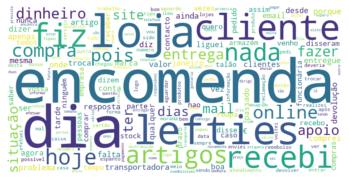

In [17]:
# Create a Word Cloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white', contour_color='white')
wordcloud.generate_from_frequencies(frequencies=df_fdist.Frequency)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### Stemming the Data

In [18]:
# Create a stemmed version of the words to normalize the Lexicon
# Import package
from nltk.stem import SnowballStemmer

In [19]:
# Do stemming
snowball = SnowballStemmer("portuguese")
# Create a new column for stemm words
complainsData['stemmedText'] = stemming(complainsData['Words'])

In [20]:
# Calculate frequency distributions of the stemmed words
fdist = FreqDist()
for review in complainsData.stemmedText:
  for term in review:
    fdist[term]+=1

# Create the sorted dataframe and sort it
df_fdist = pd.DataFrame.from_dict(fdist, orient='index')
df_fdist.columns = ['Frequency']
df_fdist.index.name = 'Term'
df_fdist = df_fdist.sort_values(by='Frequency', ascending=False)

(-0.5, 799.5, 399.5, -0.5)

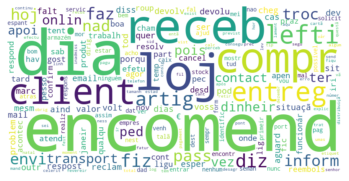

In [21]:
# Plot a new wordcloud with the stemmed words
wordcloud = WordCloud(width=800, height=400, background_color='white', contour_color='white')
wordcloud.generate_from_frequencies(frequencies=df_fdist.Frequency)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")

## N-Grams Analysis

In [22]:
# Function to count the frequency of n-grams (Adapted from https://medium.com/analytics-vidhya/automated-keyword-extraction-from-articles-using-nlp-bfd864f41b34)
# Uses CountVectorizer from sklearn instead of FreqDist from NLTK
def get_top_n_words(corpus, n=None, nGrams=1): 
    vec = CountVectorizer(max_df=0.8, ngram_range=(nGrams,nGrams), max_features=10000).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

### UNI-GRAMS

[Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, '')]

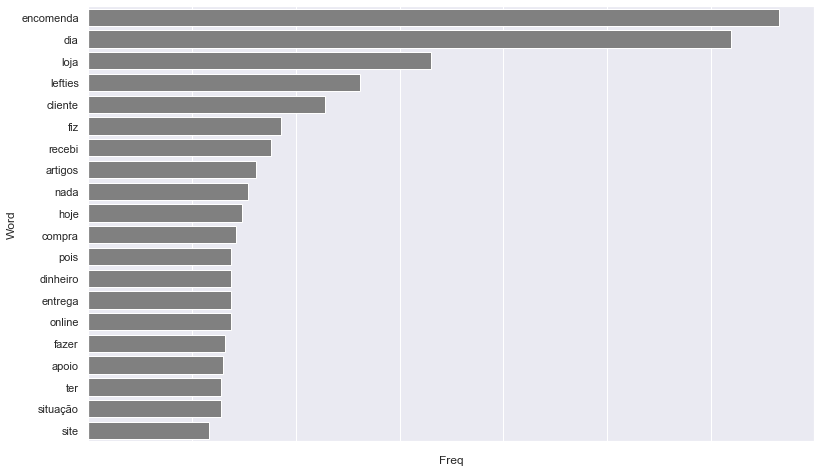

In [23]:
# PLOT top 20 most frequently occuring UNI-GRAMS
top_words = get_top_n_words(complainsData['processText'], n=20, nGrams=1)
top_df = pd.DataFrame(top_words)
top_df.columns=["Word", "Freq"]
sns.set(rc={'figure.figsize':(13,8)})
g = sns.barplot(data=top_df, x="Freq", y="Word", color="grey")
g.set_xticklabels(g.get_xticklabels(), rotation=90)

### BI-GRAMS

[Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, '')]

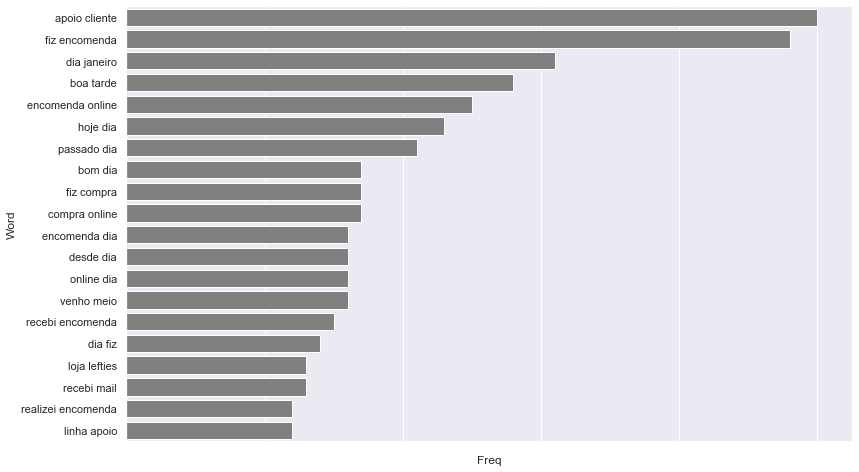

In [24]:
# PLOT top 20 most frequently occuring BI-GRAMS
top_words = get_top_n_words(complainsData['processText'], n=20, nGrams=2)
top_df = pd.DataFrame(top_words)
top_df.columns=["Word", "Freq"]
sns.set(rc={'figure.figsize':(13,8)})
g = sns.barplot(data=top_df, x="Freq", y="Word", color="grey")
g.set_xticklabels(g.get_xticklabels(), rotation=90)

### TRI-GRAMS

[Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, '')]

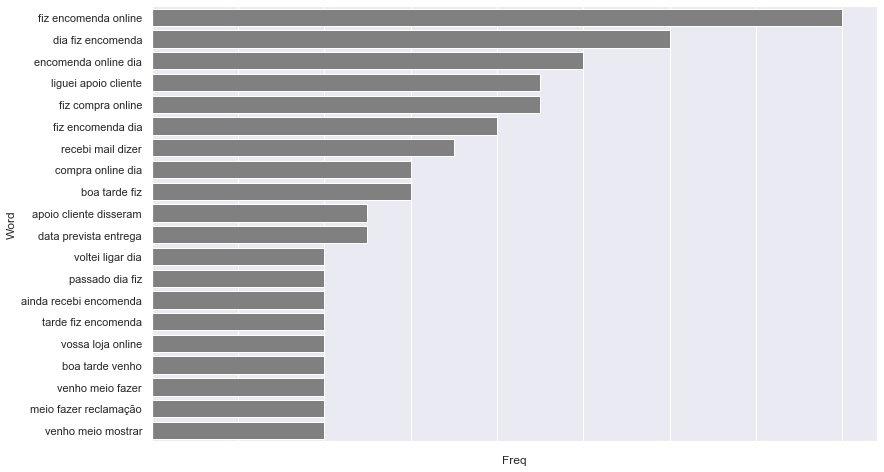

In [25]:
# PLOT top 20 most frequently occuring TRI-GRAMS
top_words = get_top_n_words(complainsData['processText'], n=20, nGrams=3)
top_df = pd.DataFrame(top_words)
top_df.columns=["Word", "Freq"]
sns.set(rc={'figure.figsize':(13,8)})
g = sns.barplot(data=top_df, x="Freq", y="Word", color="grey")
g.set_xticklabels(g.get_xticklabels(), rotation=90)

#### More visualization ideas at: https://towardsdatascience.com/a-complete-exploratory-data-analysis-and-visualization-for-text-data-29fb1b96fb6a